**Objetivo:** Identificar patrones o estructuras ocultas en los datos.

A partir de lo anterior, se pueden plantear unas preguntas clave para el negocio.

In [3]:
# Importacion de bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset_pf_mineria_datos.csv')
df.head()

,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda
0,NEGRO,S,77.750,622,F
1,NEGRO,M,55.250,442,F
2,NEGRO,UNI,59.750,478,EX
3,BEIGE,S,114.375,915,F
4,BEIGE,2XS,14.875,119,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 1234 non-null   object 
 1   talla                 1234 non-null   object 
 2   promedio_ventas_2025  1234 non-null   float64
 3   total_ventas_2025     1234 non-null   int64  
 4   tipo_prenda           1234 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 48.3+ KB


In [6]:
# Se corrigen los Dtypes | object => category
df['color'] = df['color'].astype('category')
df['talla'] = df['talla'].astype('category')
df['tipo_prenda'] = df['tipo_prenda'].astype('category')

In [7]:
df.dtypes

,0
color,category
talla,category
promedio_ventas_2025,float64
total_ventas_2025,int64
tipo_prenda,category


In [8]:
df.describe()

,promedio_ventas_2025,total_ventas_2025
count,1234.000000,1234.000000
mean,42.981159,343.849271
std,73.873087,590.984698
min,0.125000,1.000000
25%,9.875000,79.000000
50%,22.062500,176.500000
75%,51.937500,415.500000
max,1533.875000,12271.000000


**Algunas conclusiones de la anterior estadística descriptiva**
1. Se tiene una distribución asimétrica, es decir, la media (mean) es mucho mayor que la mediana (cuartíl de 50%). Esto significa que hay productos con ventas extremadamente altas que están sesgando el promedio.
2. El producto típico no vende 343 unidades, de hecho, la mitad de los productos venden 176 unidades o menos.
3. La desviación estándar el muy alta, esto refuerza la inconsistencia en el comportamiento de ventas de un producto respecto a otro.
4. Valores atípicos: El 75% de los productos de la compañia vendieron 415 prendas en lo que va del 2025, sin embargo, hay un producto con más de 12000 unidades vendidas (esta prenda es TA-104 analizando la BD, la cual es una tabla unisex que ha tenido un histórico de ventas muy alto desde enero_2023, y su comportamiento en 2025 sigue siendo alto, por tanto, no se elimina este atípico, ya que hace parte fundamental del negocio).

array([[<Axes: title={'center': 'promedio_ventas_2025'}>,
        <Axes: title={'center': 'total_ventas_2025'}>]], dtype=object)

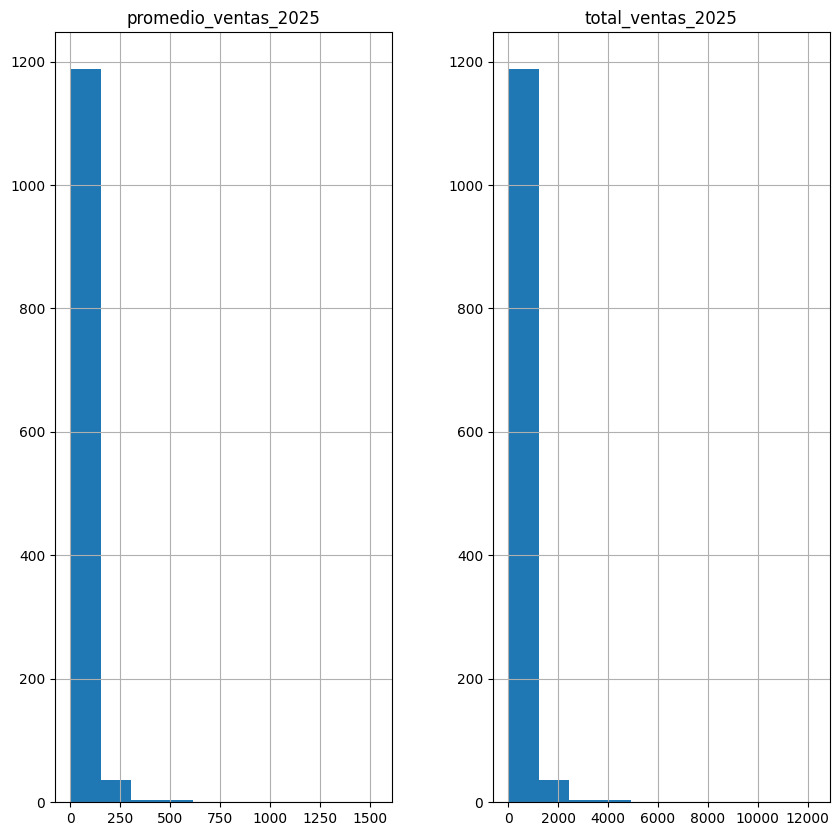

In [10]:
df.hist(figsize=(10, 10))

<Axes: >

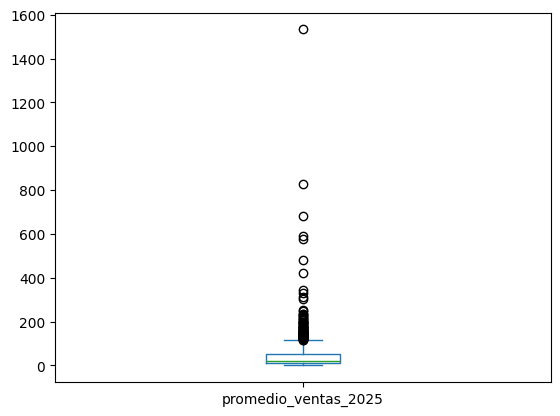

In [12]:
df['promedio_ventas_2025'].plot(kind='box')

<Axes: >

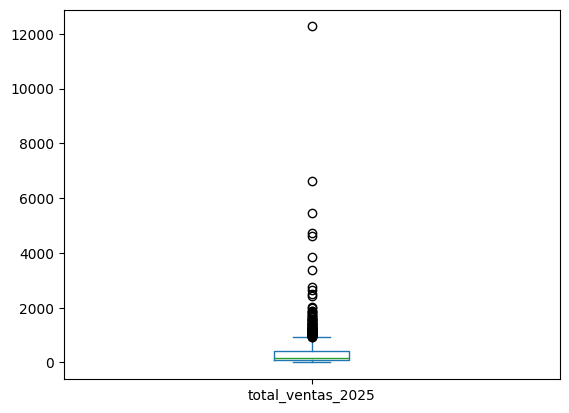

In [14]:
df['total_ventas_2025'].plot(kind='box')

<Axes: xlabel='color'>

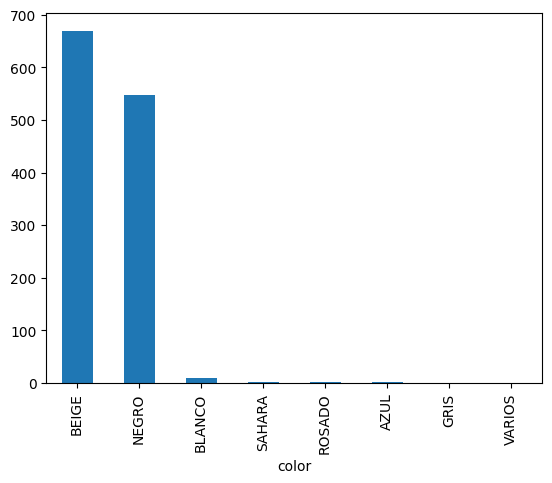

In [15]:
df['color'].value_counts().plot(kind='bar')

<Axes: xlabel='talla'>

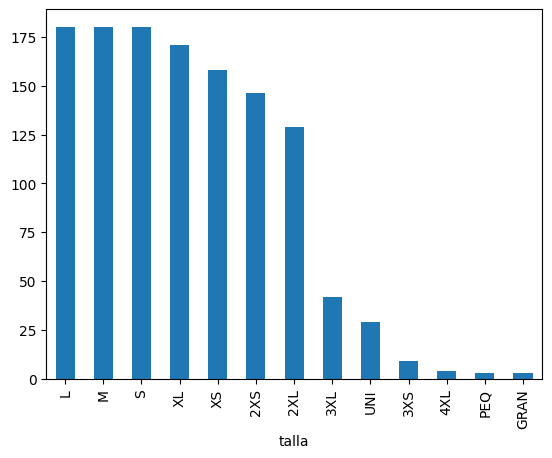

In [16]:
df['talla'].value_counts().plot(kind='bar')

<Axes: xlabel='tipo_prenda'>

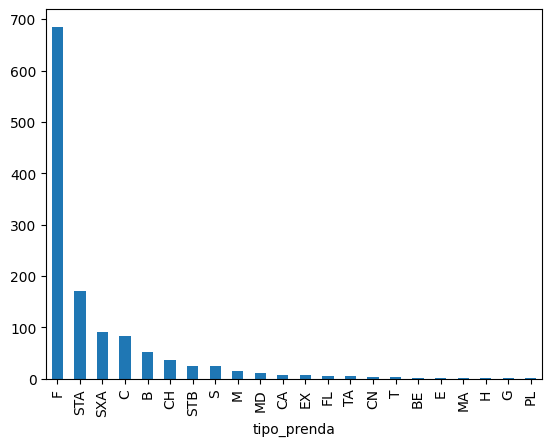

In [17]:
df['tipo_prenda'].value_counts().plot(kind='bar')

In [ ]:
# Cargar librería para Profiling
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport
# profile_data=ProfileReport(df, minimal=True) # minimal=False
# profile_data
# Guardamos en html el perfilado de datos
# profile_data.to_file(output_file="output.html")

In [19]:
# Transformaciones: NORMALIZACIÓN (MIN-MAX SCALLER) Y GET_DUMMIES()
data = df.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   color                 1234 non-null   category
 1   talla                 1234 non-null   category
 2   promedio_ventas_2025  1234 non-null   float64 
 3   total_ventas_2025     1234 non-null   int64   
 4   tipo_prenda           1234 non-null   category
dtypes: category(3), float64(1), int64(1)
memory usage: 24.7 KB


In [21]:
# Normalizacion de variables numéricas.
from sklearn.preprocessing import MinMaxScaler

# Instanciamiento (creacion de un objeto) de la clase MinMaxScaler
min_max_scaler = MinMaxScaler()
variables_a_normalizar=['promedio_ventas_2025', 'total_ventas_2025']
min_max_scaler.fit(data[variables_a_normalizar]) #Ajuste de parámetro
data[variables_a_normalizar]= min_max_scaler.transform(data[variables_a_normalizar])
data.head()

,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda
0,NEGRO,S,0.050611,0.050611,F
1,NEGRO,M,0.035941,0.035941,F
2,NEGRO,UNI,0.038875,0.038875,EX
3,BEIGE,S,0.074491,0.074491,F
4,BEIGE,2XS,0.009617,0.009617,C


In [22]:
# Se crean dummies para las variables categóricas
data = pd.get_dummies(data, columns=['color', 'talla', 'tipo_prenda'], drop_first=False, dtype=int)
data.head()

,promedio_ventas_2025,total_ventas_2025,color_AZUL,color_BEIGE,color_BLANCO,color_GRIS,color_NEGRO,color_ROSADO,color_SAHARA,color_VARIOS,...,tipo_prenda_M,tipo_prenda_MA,tipo_prenda_MD,tipo_prenda_PL,tipo_prenda_S,tipo_prenda_STA,tipo_prenda_STB,tipo_prenda_SXA,tipo_prenda_T,tipo_prenda_TA
0,0.050611,0.050611,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.035941,0.035941,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.038875,0.038875,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.074491,0.074491,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.009617,0.009617,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
"""
matriz_correlaciones = data.corr(method='pearson')
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()
"""

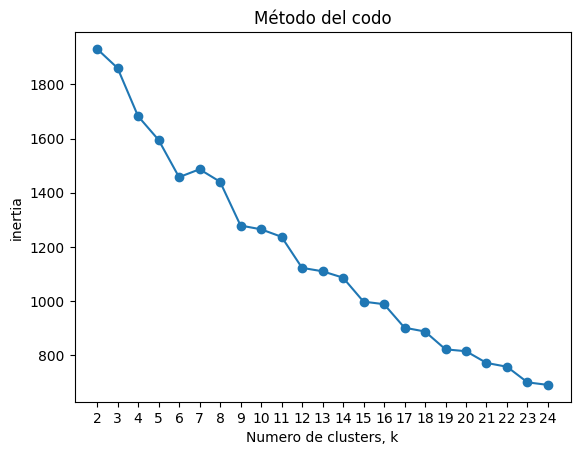

In [31]:
#Método del codo para encontrar la mejor cantidad de clusters: inertia
from sklearn.cluster import KMeans

ks = range(2, 25) # crear valores del 2 al 25
inertias = []

for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(data)
    inertias.append(model.inertia_)

# Graficar cantidad de clusters vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Método del codo')
plt.show()

# ¿Qué almacena KMEANS? => Centroides, LABELS e INERTIA.

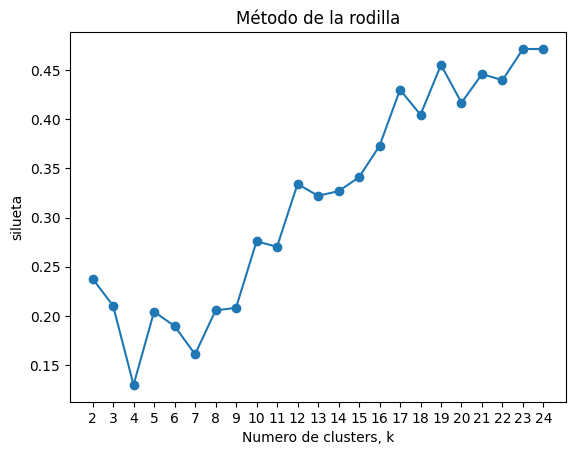

In [34]:
#Método de la rodilla: silueta
from sklearn import metrics

ks = range(2, 25) # crear valores del 2 al 25
siluetas = []

for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(data)
    sil=metrics.silhouette_score(data, model.labels_)
    siluetas.append(sil)

# Graficar cantidad de clusters vs inertias
plt.plot(ks, siluetas, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('silueta')
plt.xticks(ks)
plt.title('Método de la rodilla')
plt.show()

In [64]:
#Creación de modelo de clustering con Kmeans
from sklearn.cluster import KMeans
k=19
model = KMeans(n_clusters=k, max_iter=300)
model.fit(data) #100% datos

KMeans(n_clusters=19)

In [65]:
#Evaluación
from sklearn import metrics

#Inertia: se require valor pequeño
print('Inercia o cohesión:', model.inertia_)

#Silueta: se requiere que sea positivo, ideal 0.5-1.0
sil=metrics.silhouette_score(data, model.labels_)
print('Silueta:',sil)

Inercia o cohesión: 813.0253268385364
Silueta: 0.4533737981384361


Se tiene una inercia alta, debido a lo descrito en la estadística descriptiva, es decir, se depende de la alta variabilidad en los datos, que es natural o intrínseca del modelo de negocio.

Por otro lado, se adquirió la silueta más óptima utilizando 19 clústeres con 0.45, que aunque no es lo óptimo o esperado desde el inicio (silueta > 0.5), se desconocía la naturaleza de los datos.

Sin embargo, desde el negocio no se requiere realizar un análisis de los 19 clústeres, sino, de los clústeres que posean similitudes de nicho como productos con ventas muy altas y productos con ventas muy bajas.

In [66]:
#Centroides de los cluster se convierten  en un dataframe de pandas
centroides=pd.DataFrame(model.cluster_centers_, columns=data.columns.values)
centroides.round(1)

,promedio_ventas_2025,total_ventas_2025,color_AZUL,color_BEIGE,color_BLANCO,color_GRIS,color_NEGRO,color_ROSADO,color_SAHARA,color_VARIOS,...,tipo_prenda_M,tipo_prenda_MA,tipo_prenda_MD,tipo_prenda_PL,tipo_prenda_S,tipo_prenda_STA,tipo_prenda_STB,tipo_prenda_SXA,tipo_prenda_T,tipo_prenda_TA
0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.2,0.0,0.1,0.0,0.0
1,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.2,0.0,0.1,0.0,0.0
2,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.1,0.0,0.0
3,0.1,0.1,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0
5,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.2,0.0,0.1,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0
8,0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.1,0.0,0.0
9,0.1,0.1,0.0,0.7,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.1,0.2


In [67]:
# Se realiza una des-normalización centroides
centroides[variables_a_normalizar]=min_max_scaler.inverse_transform(centroides[variables_a_normalizar])
centroides.round(0)

,promedio_ventas_2025,total_ventas_2025,color_AZUL,color_BEIGE,color_BLANCO,color_GRIS,color_NEGRO,color_ROSADO,color_SAHARA,color_VARIOS,...,tipo_prenda_M,tipo_prenda_MA,tipo_prenda_MD,tipo_prenda_PL,tipo_prenda_S,tipo_prenda_STA,tipo_prenda_STB,tipo_prenda_SXA,tipo_prenda_T,tipo_prenda_TA
0,19.0,154.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.0,251.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,63.0,501.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,762.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63.0,503.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12.0,92.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,70.0,560.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,32.0,256.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,39.0,313.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,183.0,1464.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0


In [68]:
#En el dataframe original, se adiciona el cluster asignado a cada registro
df['cluster']=model.labels_
df.head()

,color,talla,promedio_ventas_2025,total_ventas_2025,tipo_prenda,cluster
0,NEGRO,S,77.750,622,F,13
1,NEGRO,M,55.250,442,F,2
2,NEGRO,UNI,59.750,478,EX,9
3,BEIGE,S,114.375,915,F,6
4,BEIGE,2XS,14.875,119,C,5


In [70]:
#Almacenar resultados
df.to_excel('./resultados_Kmeans.xlsx')
centroides.to_excel('./centroides.xlsx')

<Axes: ylabel='count'>

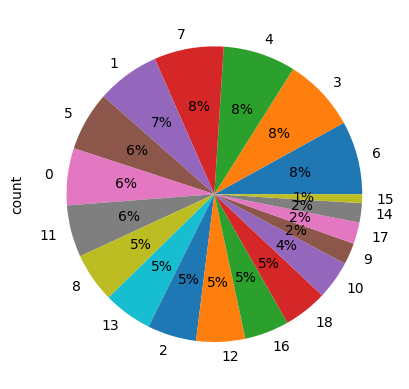

In [71]:
#Cantidad de datos en cada cluster
df["cluster"].value_counts().plot(kind='pie',autopct='%.0f%%')